In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(xtrain_raw,ytrain_raw),(xtest_raw,ytest_raw) = mnist.load_data()

(60000, 28, 28)


<function matplotlib.pyplot.show(*args, **kw)>

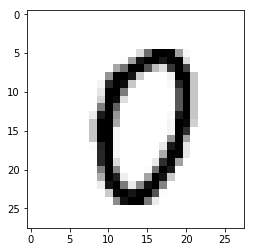

In [28]:
print(xtrain_raw.shape)
# plt.imshow(xtrain[1000])
plt.imshow(xtrain_raw[1000], cmap = plt.cm.binary)
plt.show

In [31]:
# flatten the input and normalize
xtrain = xtrain_raw.reshape(xtrain_raw.shape[0],28*28)
xtrain = tf.keras.utils.normalize(xtrain,axis=1)

xtest = xtest_raw.reshape(xtest_raw.shape[0],28*28)
xtest = tf.keras.utils.normalize(xtest,axis=1)

# convert the labels to one-shot
from keras.utils import to_categorical
ytrain = to_categorical(ytrain_raw)
ytest = to_categorical(ytest_raw)


In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, input_shape=(784,), activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

# model.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=1e-2, decay=1e-6,momentum=0.9,nesterov=True),
             loss = 'categorical_crossentropy', metrics=['accuracy'])


history = model.fit(xtrain, ytrain, epochs=3, batch_size = 256, validation_data=(xtest, ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 72us/sample - loss: 1.9425 - acc: 0.5091 - val_loss: 1.2592 - val_acc: 0.7294
Epoch 2/3
60000/60000 [==============================] - 4s 70us/sample - loss: 0.8185 - acc: 0.8032 - val_loss: 0.5622 - val_acc: 0.8495
Epoch 3/3
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4936 - acc: 0.8672 - val_loss: 0.4143 - val_acc: 0.8865


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [33]:
test_loss, test_acc = model.evaluate(xtest,ytest)
print(test_loss, test_acc)

10000/10000 [==============================] - 1s 77us/sample - loss: 0.4143 - acc: 0.8865
0.4142655323266983 0.8865


Text(0.5, 1.0, 'Accuracy Curves')

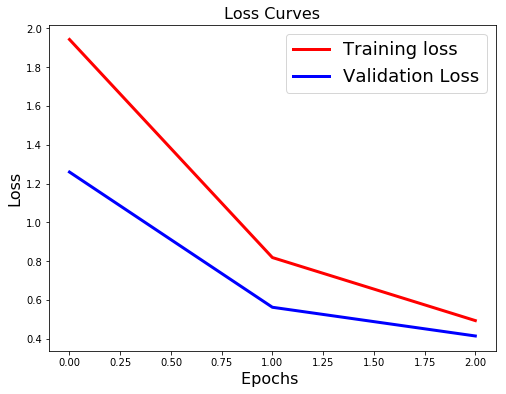

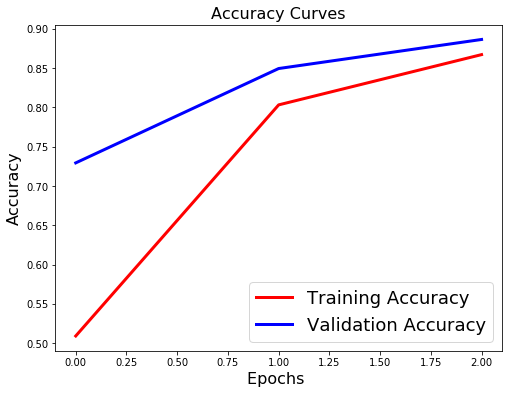

In [34]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [35]:
model.save('example_mnist.h5')

In [36]:
new_model = tf.keras.models.load_model('example_mnist.h5')

In [37]:
predictions = new_model.predict(xtest)

In [38]:
print(predictions[0])

[7.1492381e-05 7.3333302e-07 3.1724157e-05 4.8728651e-04 1.1586129e-05
 7.7741504e-05 8.2023220e-08 9.9344289e-01 7.9949328e-05 5.7965885e-03]


In [43]:
import numpy as np

print(np.argmax(predictions[100]))

6


<function matplotlib.pyplot.show(*args, **kw)>

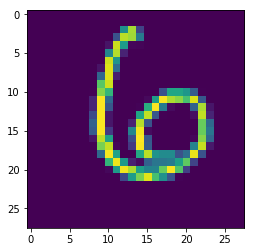

In [42]:
plt.imshow(xtest_raw[100])
plt.show

In [ ]:
import cv2
# from PIL import Image
video = cv2.VideoCapture(0)

while True:

    __,frame = video.read()
       
    # convert the captured frame into grayscale
    im = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    im = cv2.resize(im,(28,28))
    im = im.reshape(28*28)
    im = tf.keras.utils.normalize(im)
    img_array = np.array(im)
    predictions = new_model.predict(img_array)
    label = np.argmax(predictions)
    # Display the predictions
    cv2.putText(frame, "Label: {}".format(label), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    cv2.imshow("Classification", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
          break

video.release()
cv2.destroyAllWindows() 
    